# Transformata Fouriera

## Potrzebne importy

In [1]:
using Plots
using FFTW
using WAV

## Zadanie 1
Zamień sygnał na sumę sygnałów np.

`x = sin.(2*pi*t*200) + 2* sin.(2*pi*t*400)`

Zaobserwuj wynik transformaty i wyjaśnij go.

In [2]:
fs = 1024 # częstotliwość próbkowania
t = 0:1/(fs-1):1
x = sin.(2 * π * t * 200) + 2 * sin.(2 * π * t * 400)
y = fft(x);

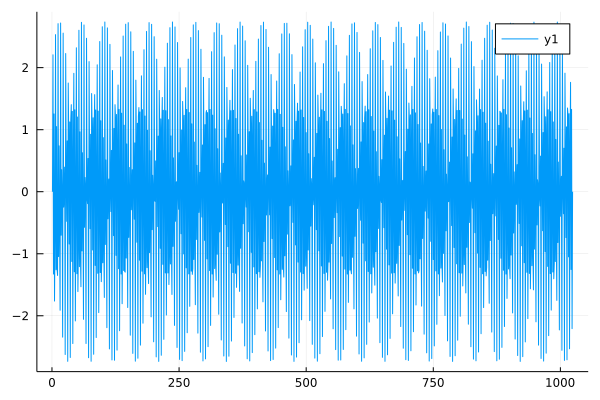

In [3]:
plot(x)

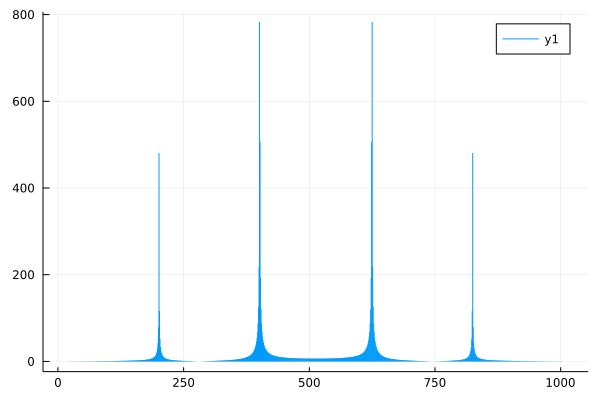

In [4]:
sticks((abs.(y)))

## Zadanie 2
Usuwanie szumów:
1. Wypełniamy tablicę wartościami funkcji cosinus ("sygnału") zaburzonej niewielkim "szumem" np. dodając do każdej wartości wylosowaną liczbę funkcją rand().
2. Proszę narysować wykres zaszumionej funkcji.
3. Narysować wykres transformaty Fouriera (widmo) tego sygnału (jak poprzednio).
4. Po transformacie wyzerowac w widmie wszystkie elementy, których wartość bezwzględna jest mniejsza niz 50. W ten sposób usuwamy "szumy" z sygnału. 
5. Przeprowadzić odwrotną transformatę funkcją ifft(). 
6. Narysować wykres otrzymanej funkcji dla częsci rzeczywistej. 
7. Porównać z wejściowym wykresem sygnału.

In [5]:
fs = 1024 # częstotliwość próbkowania
t = 0:1/(fs-1):1
xx = cos.(50* t .+.2).^2 .+ rand(length(t))/5

1024-element Vector{Float64}:
 1.1397716345114886
 1.0011221422610899
 1.0194899760378398
 1.0524090009578841
 0.8818356968860331
 0.9199811003758548
 0.9483255857648429
 0.7578555057602925
 0.773111344361861
 0.7375951335583992
 0.6116729731242844
 0.7054193661192882
 0.5354505317045445
 ⋮
 0.8357190706631812
 0.9000172382103953
 0.7779954208829077
 0.8894583129816594
 0.927752266404792
 1.0409093792114414
 1.1007002264692105
 0.9895426464140634
 1.0368932726879592
 1.0713622455751344
 1.027238522455128
 1.0443624294544738

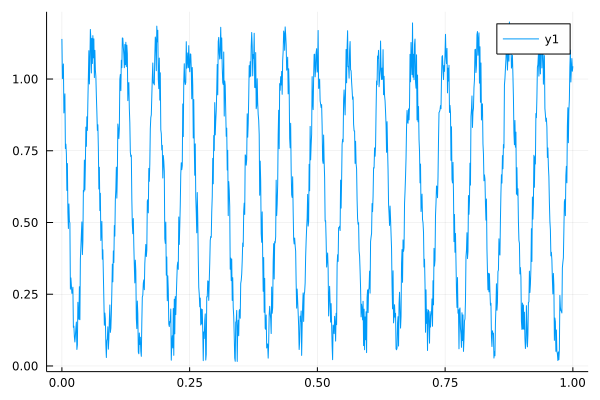

In [6]:
plot(t, xx)

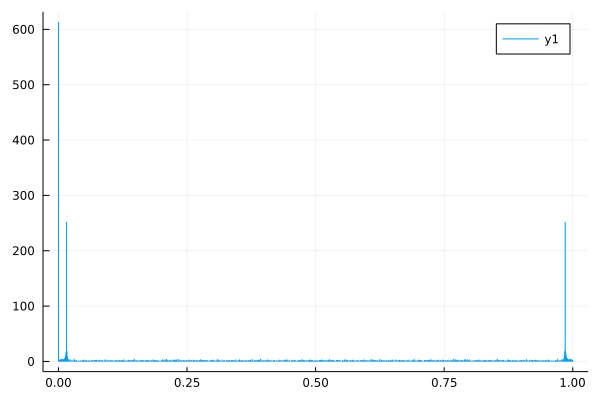

In [7]:
yy = fft(xx)
sticks(t, abs.(yy))

In [8]:
yy = ComplexF64[abs(y) < 50 ? (0 + 0im) : y for y ∈ yy];

In [9]:
ix = ifft(yy)

1024-element Vector{ComplexF64}:
  1.082382999448082 - 6.938893903907228e-18im
 1.0710813133114307 + 7.8913343427066235e-19im
 1.0552324279546783 - 2.0912078436131067e-17im
 1.0349889768076923 - 3.350181223252921e-17im
 1.0105459153712144 - 2.771811376855643e-17im
  0.982138643688814 - 4.761346967784002e-20im
 0.9500407393157877 - 3.0694240018599726e-17im
 0.9145613226177465 + 4.7088771666250706e-17im
 0.8760420797725148 - 6.431899855738723e-18im
 0.8348539721454521 + 5.444001946641404e-18im
 0.7913936637287171 - 2.7626569762540618e-17im
 0.7460797010501843 + 6.95140078208771e-18im
 0.6993484823415794 - 1.3567847131717547e-17im
                    ⋮
 0.8685145313346213 + 2.1922729697578267e-17im
 0.9075630228066782 - 1.170462626253128e-17im
 0.9436390855843848 + 2.457952055195669e-18im
 0.9763952874620101 - 7.41582241395697e-17im
 1.0055161683091112 + 3.55293656795028e-17im
 1.0307212781240374 - 1.6181343750529699e-18im
 1.0517678779207567 + 1.1527199645908318e-17im
  1.068453277437985

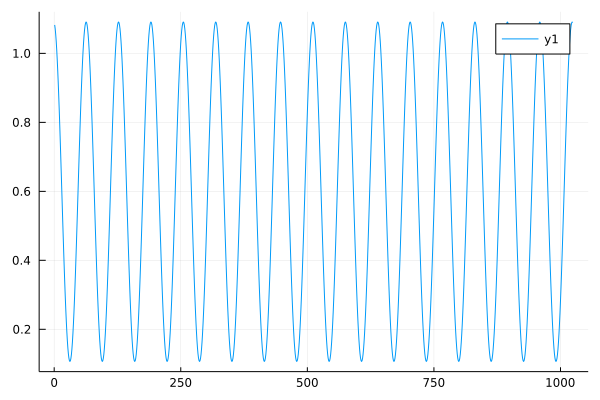

In [10]:
plot(real.(ix))

## Zadanie 3
Proszę nagrać własny glos i zastosować na nim trasformatę Fouriera, narysować wykres widma. Następnie poeksperymentować (wyciąć wybrane częstotliwości), dokonać odwrotnej transformaty i odsłuchać efekt.

In [90]:
function wavplot(s, fs; step=nothing, plottype=plot, ...kwargs)
    tt = collect(0:1/fs:(size(s)[1]-1)/fs)
    if !isnothing(step)
        tt = tt[1:step:end]
        s = s[1:step:end, :]
    end
    plottype(tt, s, xlabel="Time [s]", size=(800, 1200), layout=(2,1), ...kwargs)
end

LoadError: syntax: invalid identifier name "..."

In [85]:
function wavplotfft(s, fs)
    size = size(s)[1]
    step = size / 1000
    tt = collect(0:1/fs:(size-1)/fs)[1:step:end]
    yy = abs.(yy[:, 1][1:step:end])
    sticks(tt)
end

wavplotfft (generic function with 1 method)

In [86]:
s, fs = wavread("test2.wav");

In [87]:
wavplay(s, fs);

In [88]:
wavplot(s, fs)

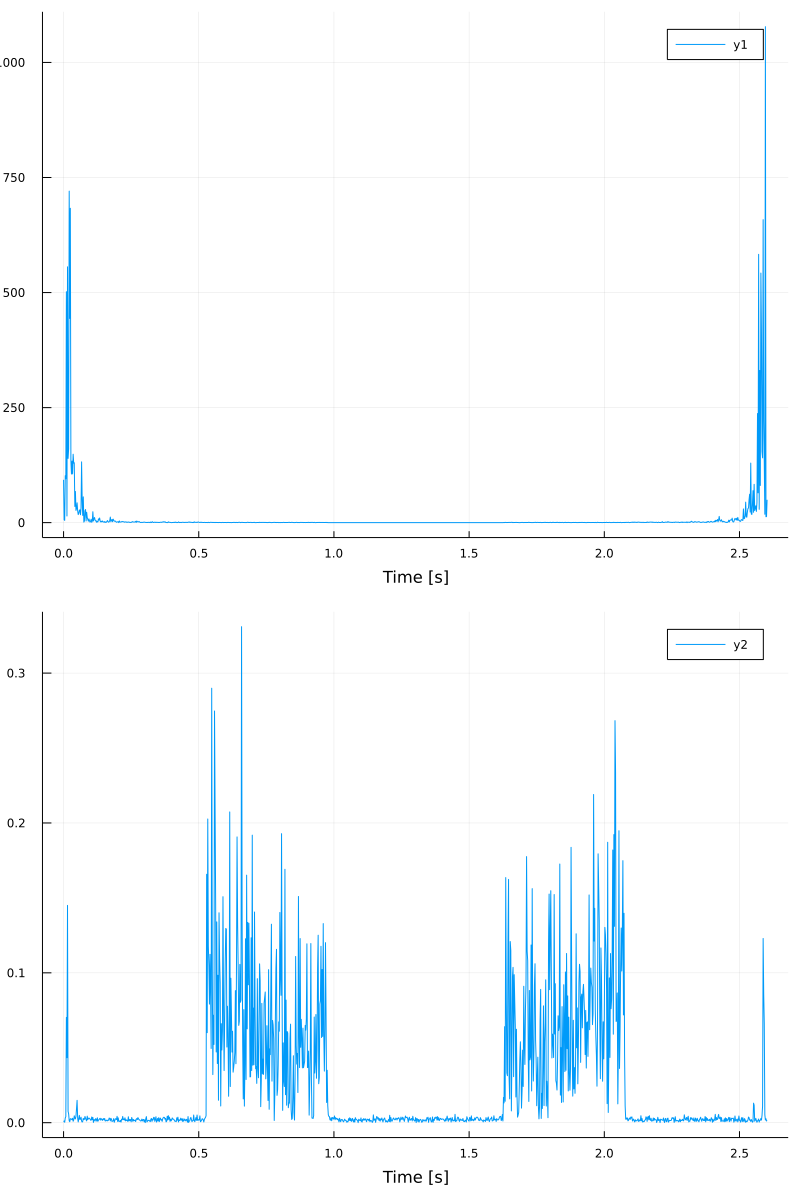

In [89]:
yy = fft(s)

# sticks(tt[1:100:end], abs.(yy[1:100:end]))
wavplot(abs.(yy), fs, step=100)

In [82]:
yy = ComplexF64[abs(y) < 250 ? (0 + 0im) : y for y ∈ yy];

In [42]:
is = ifft(yy)

129024×2 Matrix{ComplexF64}:
   -0.0044052+8.26059e-19im    -0.0044052+8.26059e-19im
  -0.00400247-4.33051e-18im   -0.00400247-4.33051e-18im
  -0.00358242-3.10394e-18im   -0.00358242-3.10394e-18im
  -0.00314666-1.07314e-18im   -0.00314666-1.07314e-18im
  -0.00269687-1.23565e-18im   -0.00269687-1.23565e-18im
  -0.00223481+1.40829e-18im   -0.00223481+1.40829e-18im
  -0.00176224+4.44782e-18im   -0.00176224+4.44782e-18im
  -0.00128102+4.72737e-19im   -0.00128102+4.72737e-19im
 -0.000793005+1.70947e-18im  -0.000793005+1.70947e-18im
 -0.000300102+2.12311e-18im  -0.000300102+2.12311e-18im
  0.000195766+3.57553e-18im   0.000195766+3.57553e-18im
  0.000692662+2.42978e-18im   0.000692662+2.42978e-18im
   0.00118864-9.61818e-19im    0.00118864-9.61818e-19im
             ⋮               
  -0.00741165-5.06755e-18im   -0.00741165-5.06755e-18im
  -0.00731172-6.42161e-19im   -0.00731172-6.42161e-19im
  -0.00718208-4.81564e-18im   -0.00718208-4.81564e-18im
  -0.00702316+9.53347e-19im   -0.00702316+9.5

In [43]:
plot(tt, real.(is), xlabel="Time [s]", size=(800, 1200), layout=(2,1))

In [44]:
wavwrite(real.(ix[:, 1]), "processed.wav", Fs=fs)

In [49]:
wavplay(real.(ix[:, 1]), fs)